## 2.2Logistic Regression

#### 2.2.1 Linear Classifier
$$
f(x) = w^Tx + b = \sum^N_{j=1}w_jx_j+b
$$
$$
where\ w\in R^N is the weight vector
$$
classified by$ f(x) > 0 or f(x) < 0 $----- Equivalently, $y = sign(f(x))$

**$w^Tx+b=0$ defines an N-1 demensional linear surface** 


#### 2.2.2 Logistic Regression
* Logistic regression takes a probabilistic approach
map the function value $f(x)$ to a probability value between 0 and 1

**sigmoid funciton**
  $$
  \sigma(z) = \frac1{1+e^{-z}}
  $$

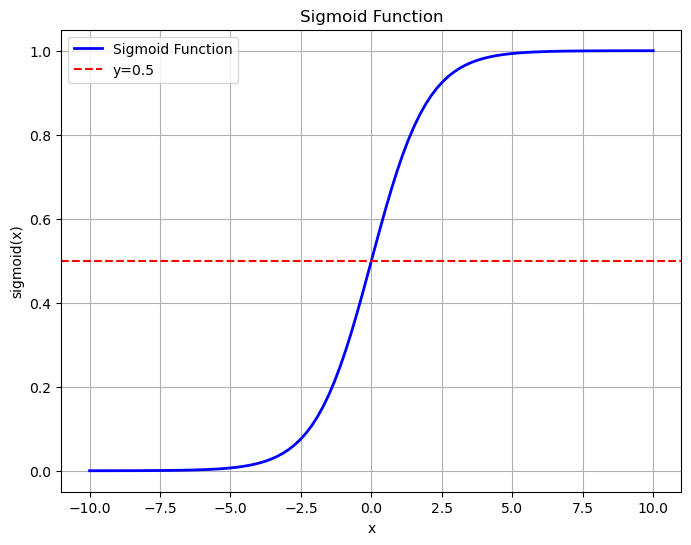

In [1]:
# here for the plot of sigmoid function
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)  # 100 points between -10 and 10

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')  # Adding y=0.5 line
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Given a feature vector x the probability of a class
$$
p(y=+1|x)=\sigma(f(x))
$$
$$
p(y=-1|x)=1-\sigma(f(x)) = \sigma(-f(x))
$$
$$
Equivalently:p(y|x) = \sigma(yf(x))
$$

#### 2.2.3Learning the Parameters

MLE:
$$
(w^*,b^*) = arg\ max_{w,b} \frac1M\sum^M_{i=1}logp(y^i|x^i,w;b)
$$
$$
=arg\ max_{w,b} -\frac1M\sum^M_{i=1}log(1+exp(-y^i(w^Tx^i+b)))
$$

**to prevent overfitting**
we assume Gaussian distribution on p(w) with variance C/2
$$
p(w) \propto exp(-\frac1C w^Tw)
$$
Now:
$$
(w^*,b^*) = arg\ max_{w,b} \frac1M\sum^M_{i=1}logp(w|x^i,y^i;b)
$$
$$
= arg\ max_{w,b} \frac1M\sum^M_{i=1}log\frac{p(w)p(y^i|x^i,w;b)}{p(y^i|x^i)}
$$

Equivalently
$$
(w^*,b^*) = arg\ min \frac1C w^Tw + \frac1M\sum^M_{i=1}log(1+exp(-y^i(w^Tx^i+b)))
$$

**if we define z^i = y^if(x^i)**
* z^i > 0 when sample x^i is classifed correctly
* z^i < 0 when sample x^i is classifed incorrectly
* z^i = 0 when sample x^i is on classifier boundary

#### 2.2.4 Logistic Loss Function
L(z) = log (1+exp(-z))

Use an iterative optimization algorithm to find the optimal solution:gradient descent

$w\leftarrow w-\eta\frac{\partial l}{\partial w}$

#### 2.2.5 Selecting the Regularization Hyperparameter
Use cross-validation on training set to select the best value of C
* Procedure

(1)Select a range of C values to try

(2)Repeat K rounds

(3)Select the value of that has the highest average accuracy over all 
K rounds

(4)4 Retrain the classifier using all data and the selected2.2


#### 2.2.5 Multiclass Logistic Regression
softmax function
$$
p(y=c|x) = \frac{exp(w_c^Tx)}{exp(w^T_1x)+...+exp(w_C^Tx)}
$$

Estimate the $w_i$ parameters using MLE as before


### Logistic Regression Versus NB and LDA

Speed: Learning logistic regression requires iterative numerical 
optimization, which will be slower than NB and LD

stStorage: The model require$s O($N) parameters, the same order  s
NB, but much less than LD$O(N^2)$

2)
Interpretability: The “importance” of feat$u_r$e xj can be
understood in terms of the corresponding learned we$i_g$hure 2.2


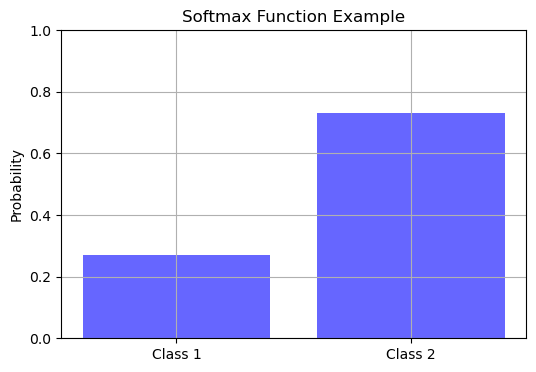

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# Generate x values
x = np.array([1, 2])

# Calculate softmax values
softmax_values = softmax(x)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(np.arange(len(x)), softmax_values, color='blue', alpha=0.6)
plt.xticks(np.arange(len(x)), ['Class 1', 'Class 2'])
plt.ylabel('Probability')
plt.title('Softmax Function Example')

# Show plot
plt.ylim(0, 1)
plt.grid(True)
plt.show()
